In [1]:
#including all the necessary modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
def load_data(path):
    # reading data from .txt file and assigning names to columns
    data = pd.read_csv(path, sep=":::", names=["ID", "Title", "Genre", "Plot"], engine="python")
    # dropping the column 'ID'
    data.drop(columns=["ID"], inplace=True)
    return data

In [3]:
#loading the train data set
df = load_data("train_data.txt")

In [4]:
#displaying some of the first few elements in the table 
df.head()

,Title,Genre,Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   54214 non-null  object
 1   Genre   54214 non-null  object
 2   Plot    54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [8]:
#downloading packages
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#removing stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [10]:
#function to remove unwanted symbols and join the non-stopwords
def clean_plot(plot):
    plot = plot.lower()
    plot = re.sub(r'[^a-zA-Z\s]+', '', plot).strip()
    words = plot.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [11]:
#loading the test_data

test_data = load_data("test_data_solution.txt")

In [12]:
#plot is replaced with cleaned plot using clean_plot function

df['Clean Plot'] = df['Plot'].apply(clean_plot)
test_data['Clean Plot'] = test_data['Plot'].apply(clean_plot)

# Feature Extraction

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.8, min_df=5, max_features=50000)
X_train = vectorizer.fit_transform(df['Clean Plot'])
X_test = vectorizer.transform(test_data['Clean Plot'])
y_train = df['Genre']
y_test = test_data['Genre']

In [13]:
#applying logistic regression
log_reg = LogisticRegression(max_iter=1000)

In [14]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = log_reg.predict(X_test)

In [16]:
# Evaluating and printing the performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {(accuracy * 100):.2f}%")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy = 59.11%
               precision    recall  f1-score   support

      action        0.52      0.27      0.35      1314
       adult        0.65      0.22      0.32       590
   adventure        0.69      0.16      0.25       775
   animation        0.59      0.04      0.08       498
   biography        1.00      0.00      0.00       264
      comedy        0.54      0.60      0.57      7446
       crime        0.34      0.02      0.04       505
 documentary        0.67      0.87      0.75     13096
       drama        0.54      0.80      0.64     13612
      family        0.56      0.08      0.14       783
     fantasy        0.73      0.03      0.07       322
   game-show        0.90      0.52      0.66       193
     history        1.00      0.00      0.00       243
      horror        0.68      0.58      0.63      2204
       music        0.68      0.41      0.52       731
     musical        0.33      0.01      0.01       276
     mystery        0.33      0.00      0.01  

#The accuracy score I got after cleaning the plot and using logistic regression is 59.11% 

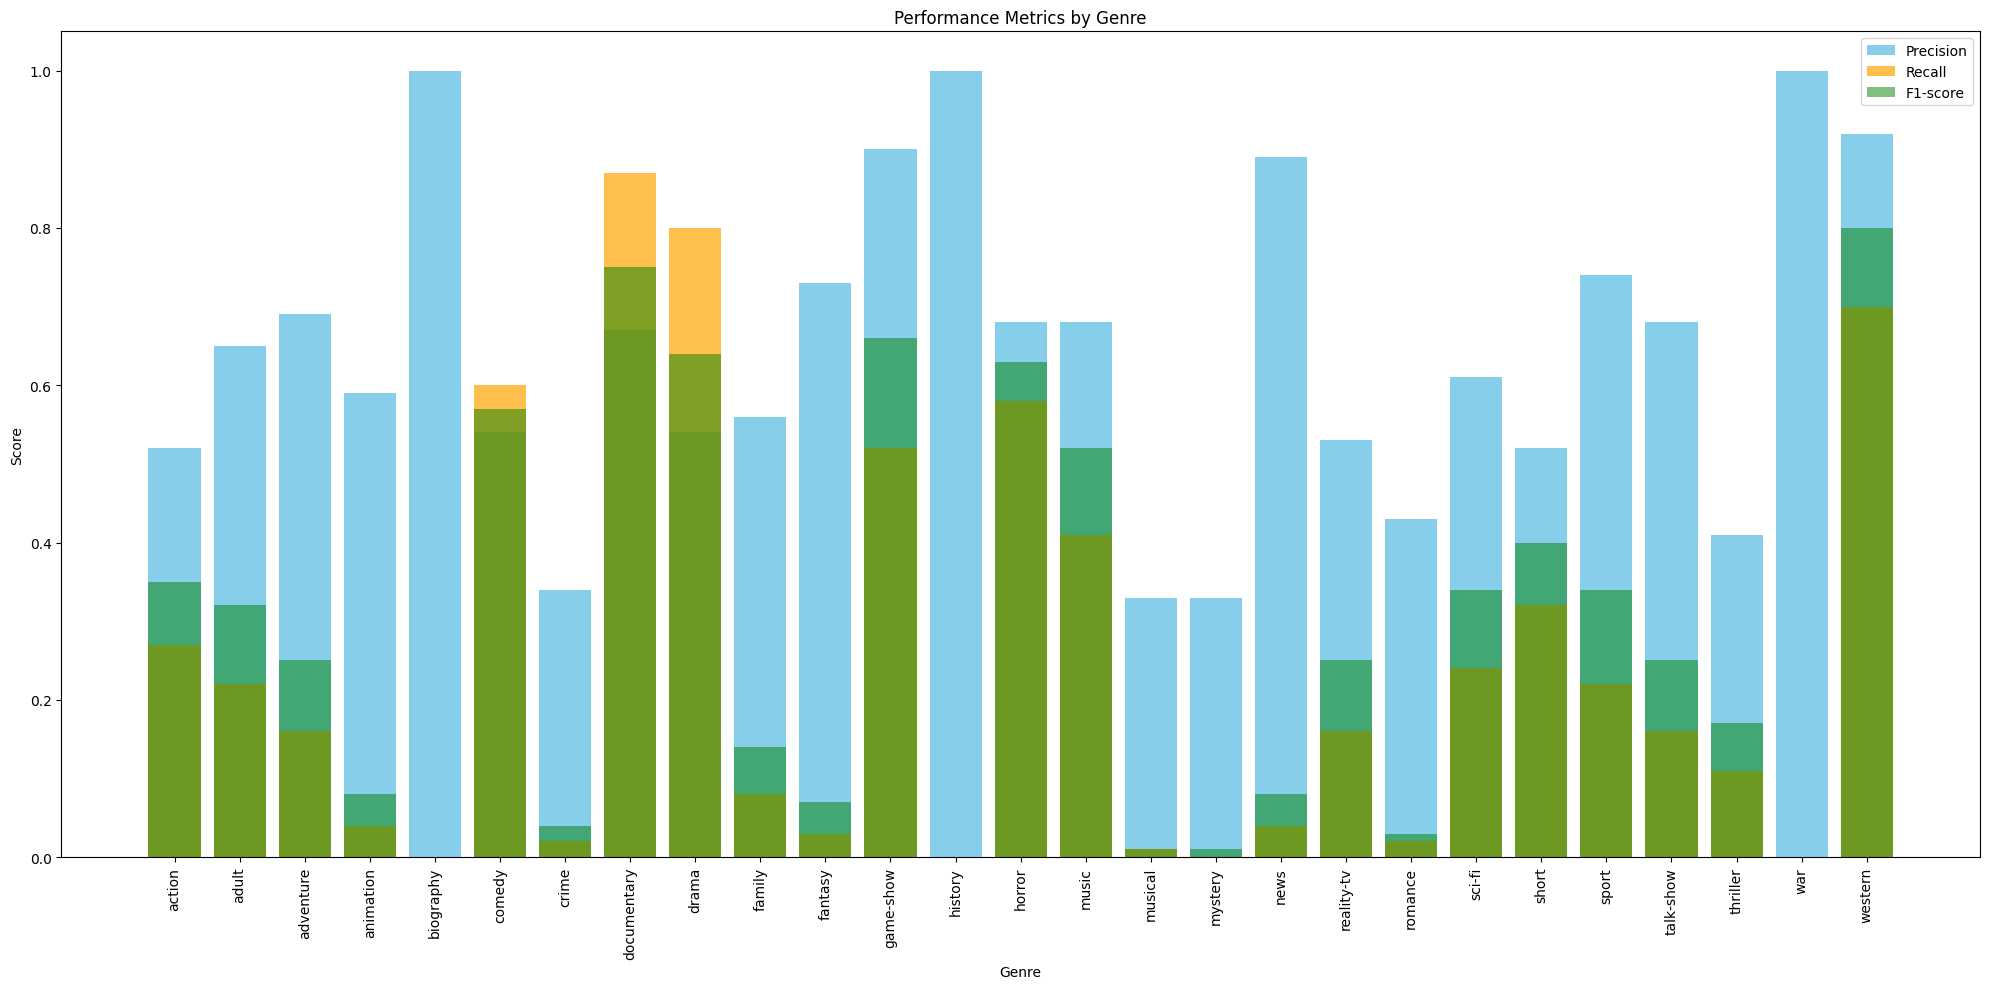

In [18]:
#Displaying the performance metrics using bar chart
# Genre labels
genres = ['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 
          'drama', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 
          'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 
          'western']

# Precision, recall, and F1-score values for each genre
precision = [0.52, 0.65, 0.69, 0.59, 1.00, 0.54, 0.34, 0.67, 0.54, 0.56, 0.73, 0.90, 1.00, 0.68, 0.68, 
             0.33, 0.33, 0.89, 0.53, 0.43, 0.61, 0.52, 0.74, 0.68, 0.41, 1.00, 0.92]
recall = [0.27, 0.22, 0.16, 0.04, 0.00, 0.60, 0.02, 0.87, 0.80, 0.08, 0.03, 0.52, 0.00, 0.58, 0.41, 0.01, 
          0.00, 0.04, 0.16, 0.02, 0.24, 0.32, 0.22, 0.16, 0.11, 0.00, 0.70]
f1_score = [0.35, 0.32, 0.25, 0.08, 0.00, 0.57, 0.04, 0.75, 0.64, 0.14, 0.07, 0.66, 0.00, 0.63, 0.52, 0.01, 
            0.01, 0.08, 0.25, 0.03, 0.34, 0.40, 0.34, 0.25, 0.17, 0.00, 0.80]

# Plotting
plt.figure(figsize=(20, 10))

plt.bar(genres, precision, color='skyblue', label='Precision')
plt.bar(genres, recall, color='orange', alpha=0.7, label='Recall')
plt.bar(genres, f1_score, color='green', alpha=0.5, label='F1-score')

plt.title('Performance Metrics by Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()
